In [ ]:
!pip install jcopml

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
df = pd.read_csv("/content/drive/MyDrive/00_Image_Processing/Data/Lowsal_1000_Data.csv", index_col = "ID")
df.head()

,Generator,Status,Result Status,Proxy Role,Keep SR2,Has SR2,Highlight,Aqu_Ca,Aqu_Cl,Aqu_Mg,...,Inj_NaComp,Inj_SO4Comp,InjectorStw,Tres,Inj_Temp,Oil_Recovery,Execution Node,Dataset Path,Optimal,Comment
ID,,,,,,,,,,,,,,,,,,,,,
0,Reuse,Reused,NormalTermination,Ignore,Yes,True,False,0.461377,4.232650,0.095454,...,0.039800,0.002233,265.698099,186.0,200.0,54.070404,NaN,Lowsal Base.dat,False,NaN
1,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.455662,5.896138,0.089591,...,0.055044,0.000430,225.843800,195.3,240.0,58.107647,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00001.dat,False,NaN
2,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.118815,5.896138,0.130806,...,0.037691,0.001479,305.553200,204.6,240.0,54.625271,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00002.dat,False,NaN
3,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.203027,1.014785,0.089591,...,0.037691,0.000167,318.838100,213.9,200.0,62.981243,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00003.dat,False,NaN
4,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,False,0.539874,3.106793,0.172022,...,0.046368,0.001217,265.698500,167.4,220.0,53.564529,DESKTOP-TOCK0PK,Lowsal_SA.cmsd\Lowsal_SA_00004.dat,False,NaN


In [9]:
df.columns

Index(['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR2',
       'Has SR2', 'Highlight', 'Aqu_Ca', 'Aqu_Cl', 'Aqu_Mg', 'Aqu_Na',
       'Aqu_SO4', 'Inj_CaComp', 'Inj_Cl', 'Inj_MgComp', 'Inj_NaComp',
       'Inj_SO4Comp', 'InjectorStw', 'Tres', 'Inj_Temp', 'Oil_Recovery',
       'Execution Node', 'Dataset Path', 'Optimal', 'Comment'],
      dtype='object')

In [10]:
df.drop(columns= (['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR2',
                  'Has SR2', 'Highlight', 'Execution Node', 'Dataset Path', 'Optimal', 'Comment']), inplace = True)
df.head()

,Aqu_Ca,Aqu_Cl,Aqu_Mg,Aqu_Na,Aqu_SO4,Inj_CaComp,Inj_Cl,Inj_MgComp,Inj_NaComp,Inj_SO4Comp,InjectorStw,Tres,Inj_Temp,Oil_Recovery
ID,,,,,,,,,,,,,,
0,0.461377,4.232650,0.095454,2.980450,0.006371,0.000811,0.045412,0.004341,0.039800,0.002233,265.698099,186.0,200.0,54.070404
1,0.455662,5.896138,0.089591,0.773737,0.003324,0.008118,0.028078,0.013916,0.055044,0.000430,225.843800,195.3,240.0,58.107647
2,0.118815,5.896138,0.130806,4.625155,0.002375,0.005432,0.040414,0.012406,0.037691,0.001479,305.553200,204.6,240.0,54.625271
3,0.203027,1.014785,0.089591,5.725560,0.009964,0.008118,0.003406,0.001836,0.037691,0.000167,318.838100,213.9,200.0,62.981243
4,0.539874,3.106793,0.172022,1.874142,0.001426,0.003642,0.089757,0.003346,0.046368,0.001217,265.698500,167.4,220.0,53.564529


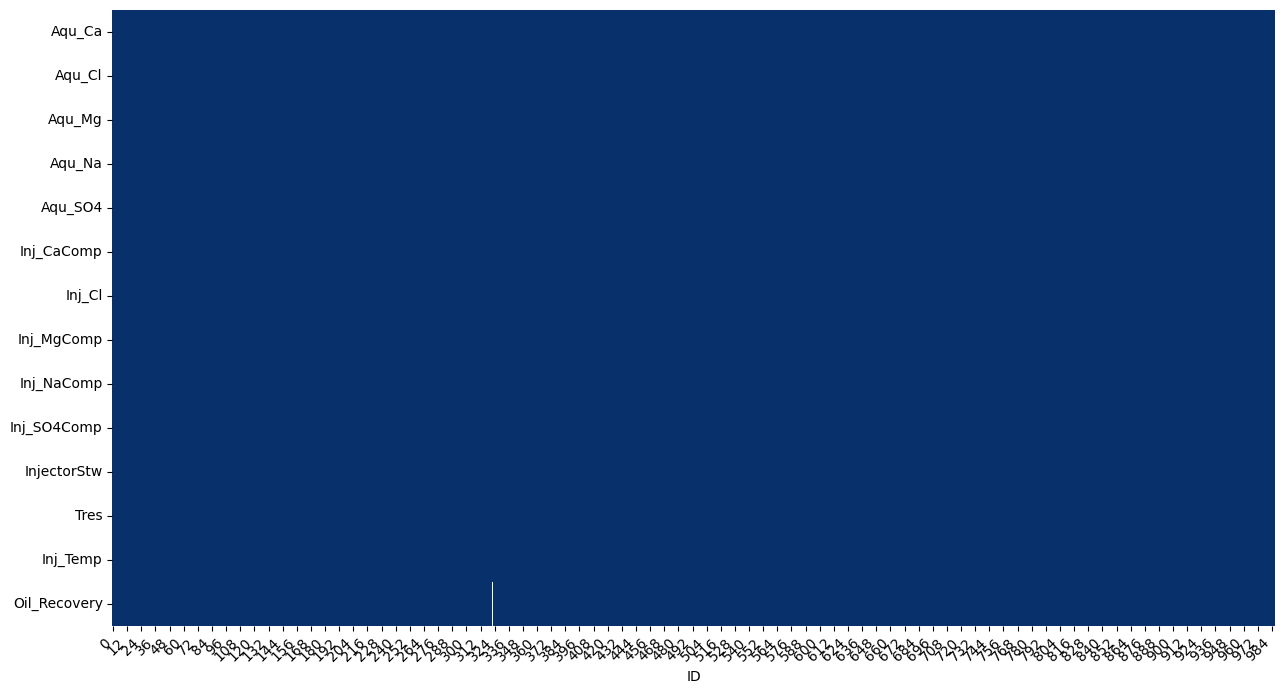

In [11]:
plot_missing_value(df)

In [12]:
df.dropna(inplace = True)

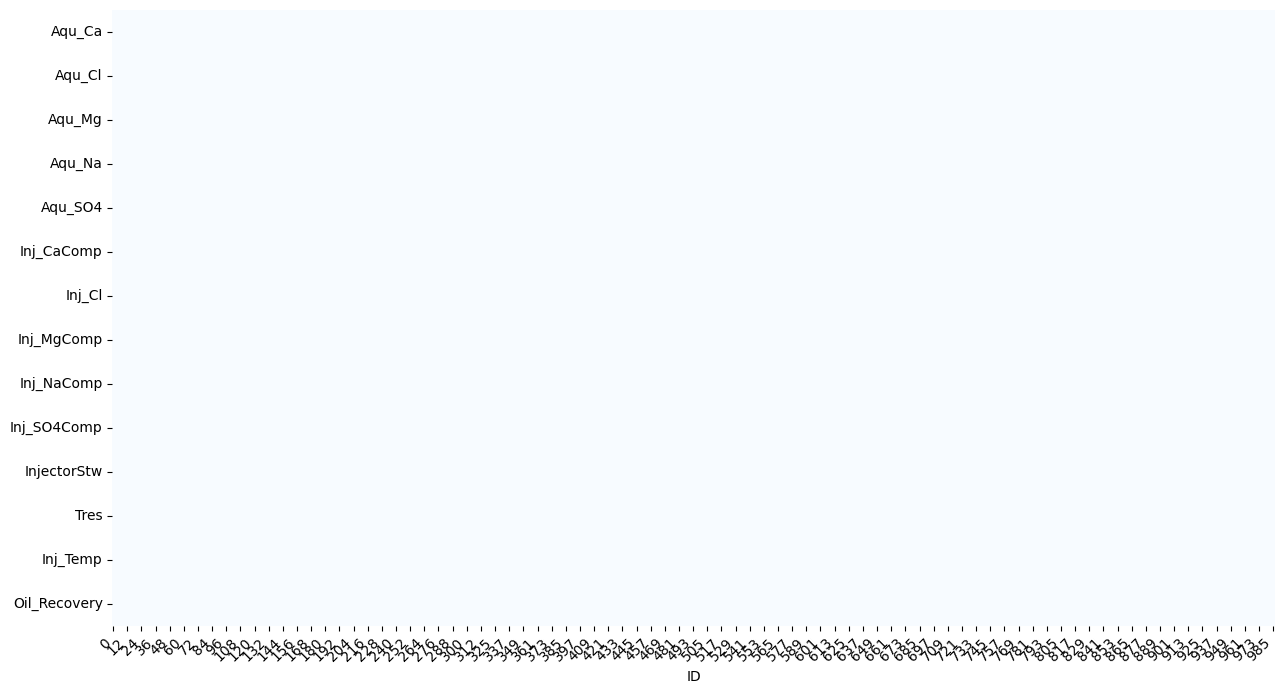

In [13]:
plot_missing_value(df)

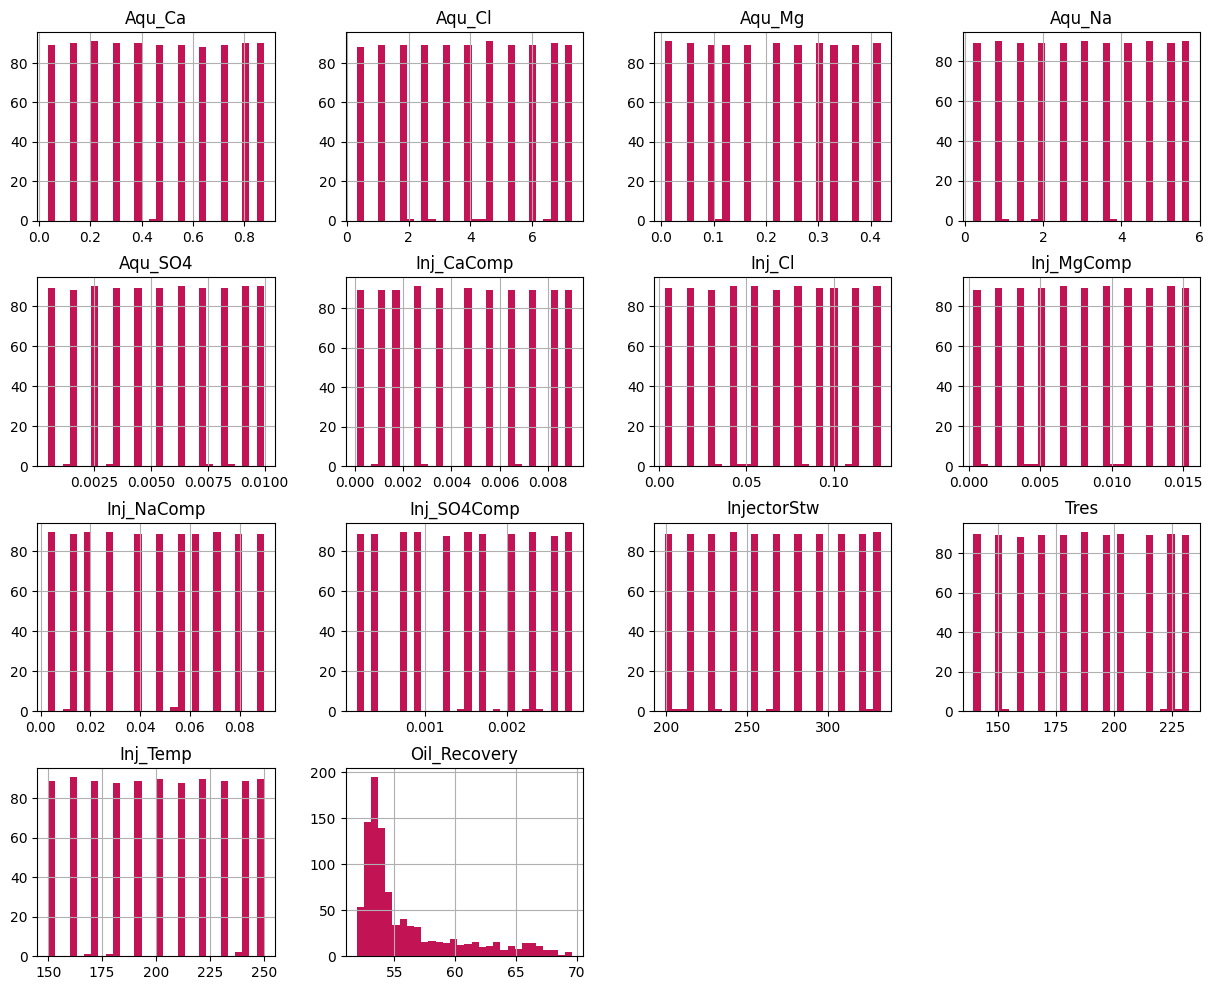

In [22]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15, 12), color='#c21454')
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Histogram_600dpi.png', dpi = 600)

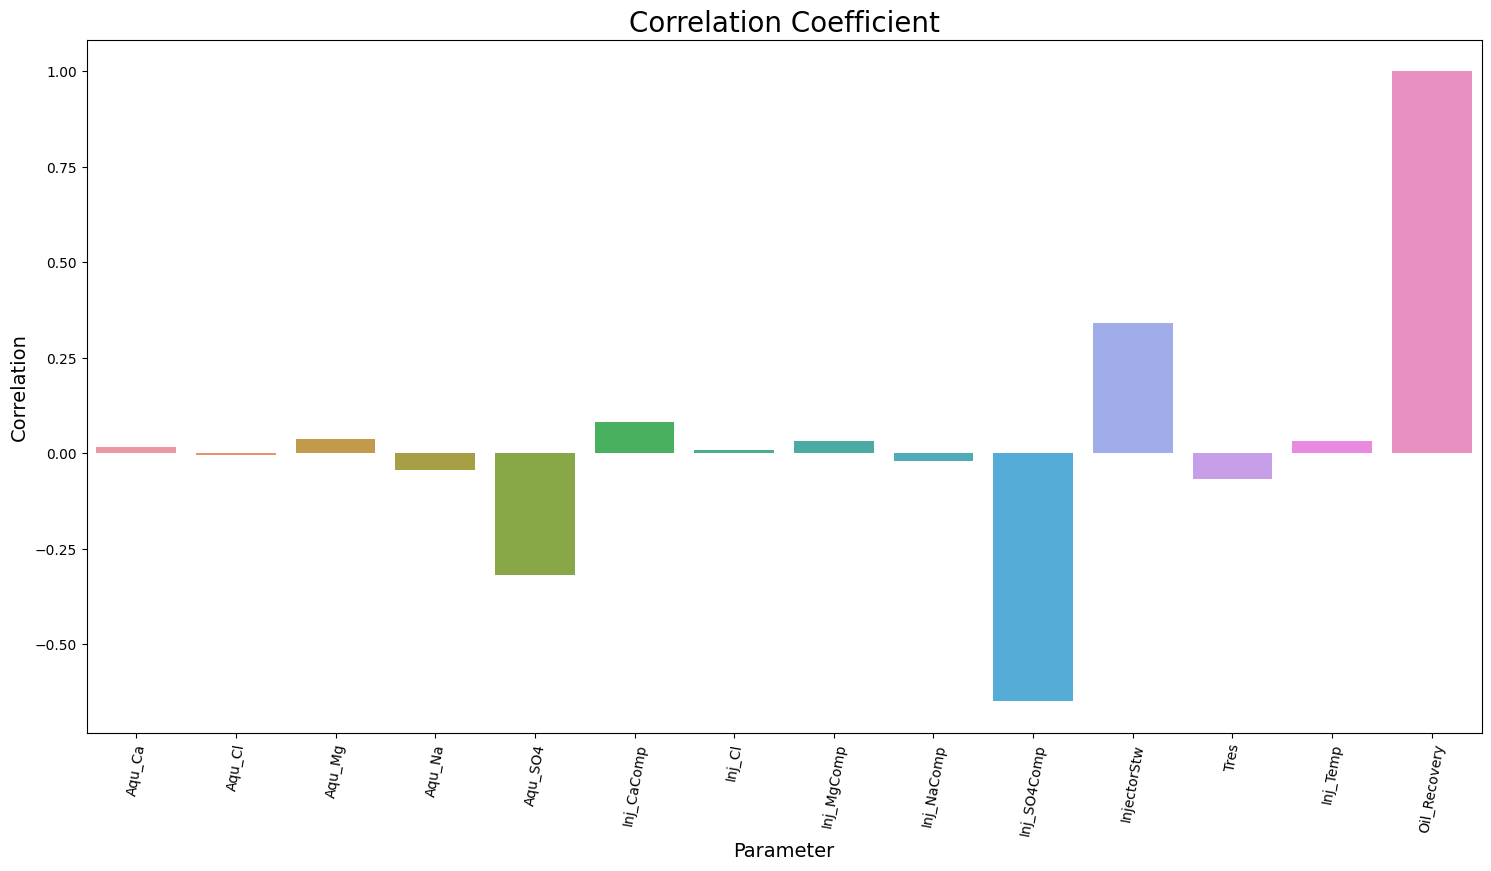

In [17]:
# A par plot showing the correlations between Porosity and other Attributes
import seaborn as sns
import matplotlib.pyplot as plt


# Calculating the correlation
cor = df.corr(method="pearson")
Oil_Recovery_cor = cor.loc[['Oil_Recovery']].T

RF_cor = Oil_Recovery_cor.reset_index()

# Create the bar plot
plt.figure(figsize=(18, 9))
sns.barplot(x='index', y='Oil_Recovery', data=RF_cor)
plt.title("Correlation Coefficient", fontsize=20)
plt.xlabel("Parameter", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=80)
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/CorrFigure_600dpi.png', dpi = 600)
plt.show()

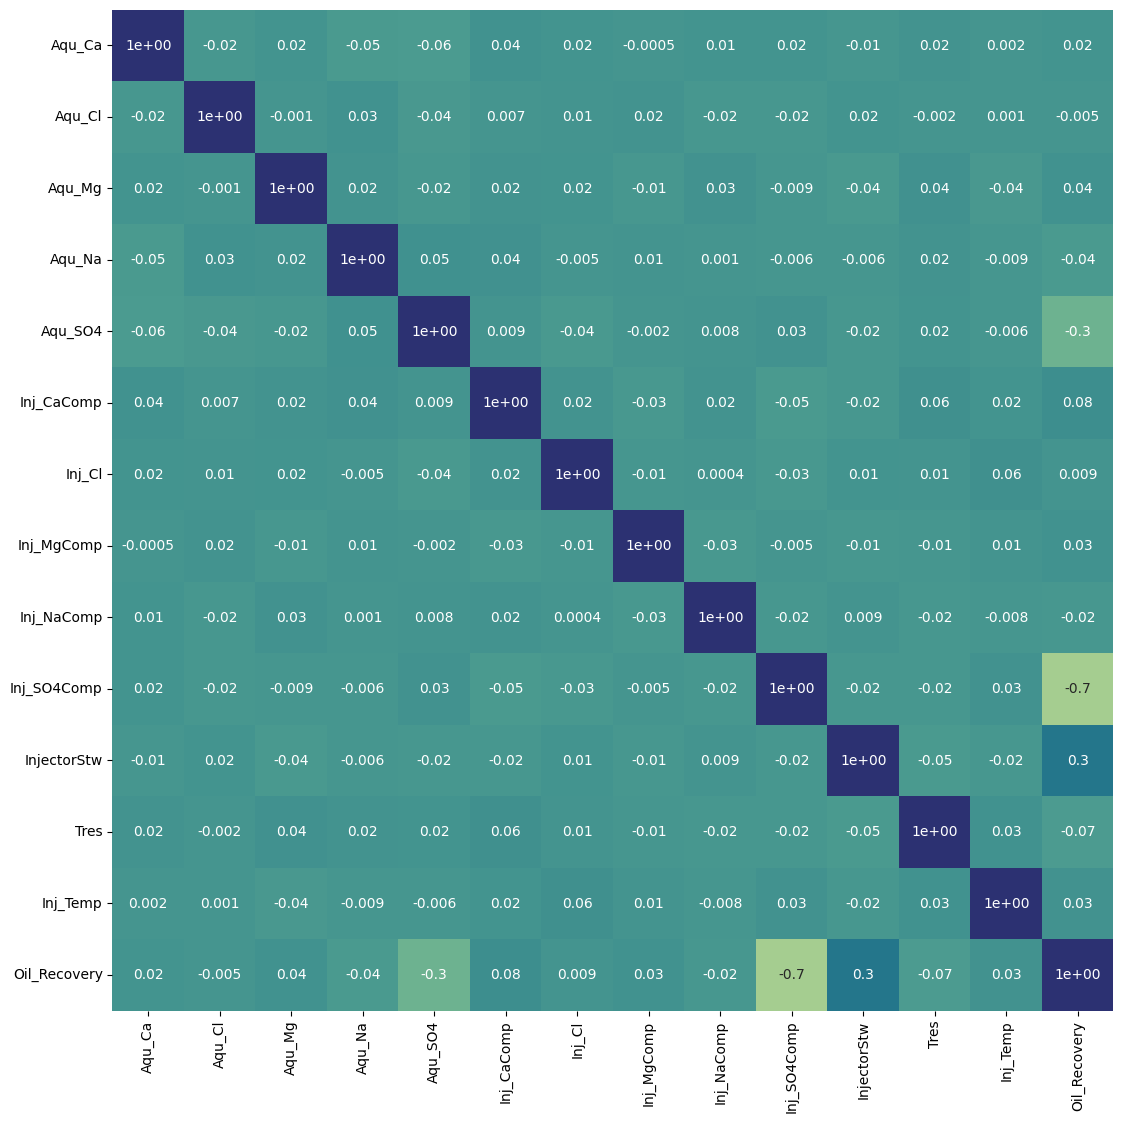

In [16]:
plt.figure(figsize = (17, 13))
sns.heatmap(df.corr(), cmap= "crest", cbar= False, annot= True, square= True, fmt= '.1')
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/corrplot_600dpi.png', dpi = 600)

In [19]:
X = df.drop(columns='Oil_Recovery')
y = df.Oil_Recovery

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((788, 13), (198, 13), (788,), (198,))

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly = 1), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 48, 'algo__max_features': 0.8219772826786358, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 188}
0.9897072580825568 0.9066352219621144 0.9099736038350833


In [24]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

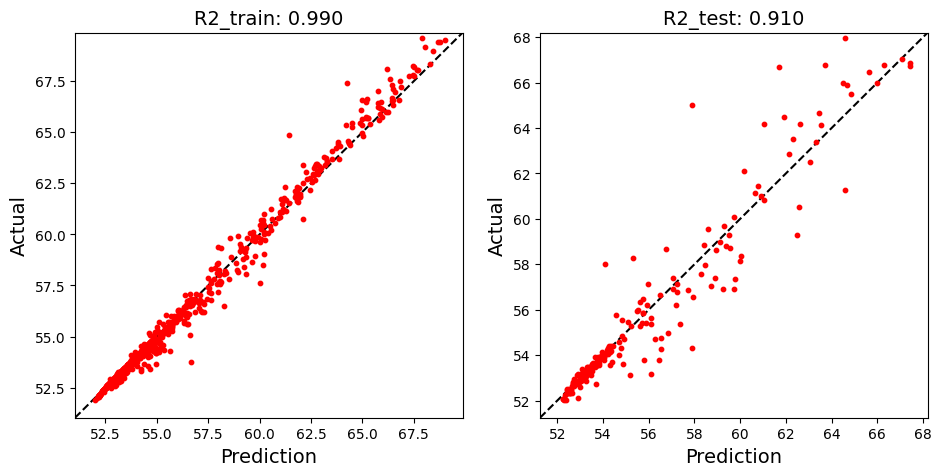

In [25]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

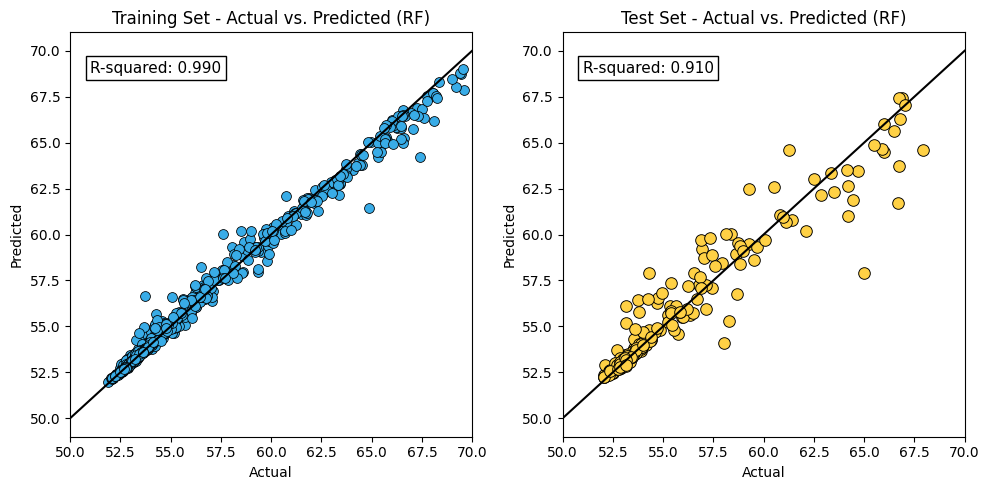

In [28]:
# Predict on training and test sets
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# ...

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0], s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (RF)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_xlim(50, 70)  # Set the x-axis range between 50 and 70

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([50, 70], [50, 70], color='black', linestyle='-')  # Set the line range

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1], s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (RF)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_xlim(50, 70)  # Set the x-axis range between 50 and 70

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([50, 70], [50, 70], color='black', linestyle='-')  # Set the line range

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Regression_600dpi.png', dpi=600)
plt.show()

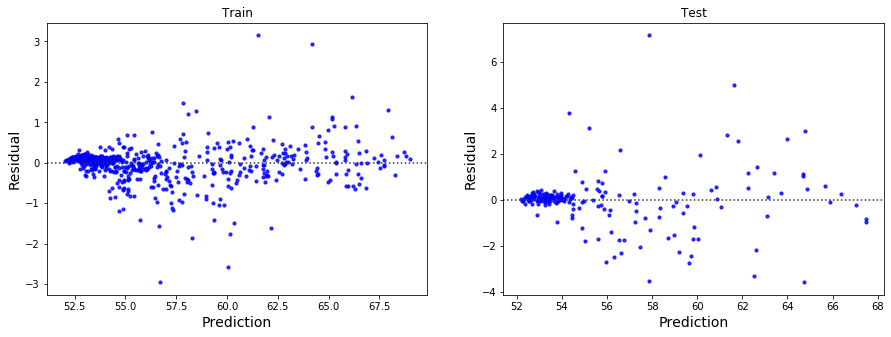

In [ ]:
plot_residual(X_train, y_train, X_test, y_test, model_RF, lowess=False)

In [29]:
from jcopml.feature_importance import mean_loss_decrease, mean_score_decrease

,feature,importance,stdev
9,Inj_SO4Comp,1.260583,0.022501
4,Aqu_SO4,0.439618,0.028117
10,InjectorStw,0.340190,0.009778
1,Aqu_Cl,0.012991,0.002516
7,Inj_MgComp,0.009752,0.000664
11,Tres,0.008951,0.000445
12,Inj_Temp,0.007667,0.000381
3,Aqu_Na,0.006398,0.000418
5,Inj_CaComp,0.005744,0.000369
0,Aqu_Ca,0.004273,0.000381


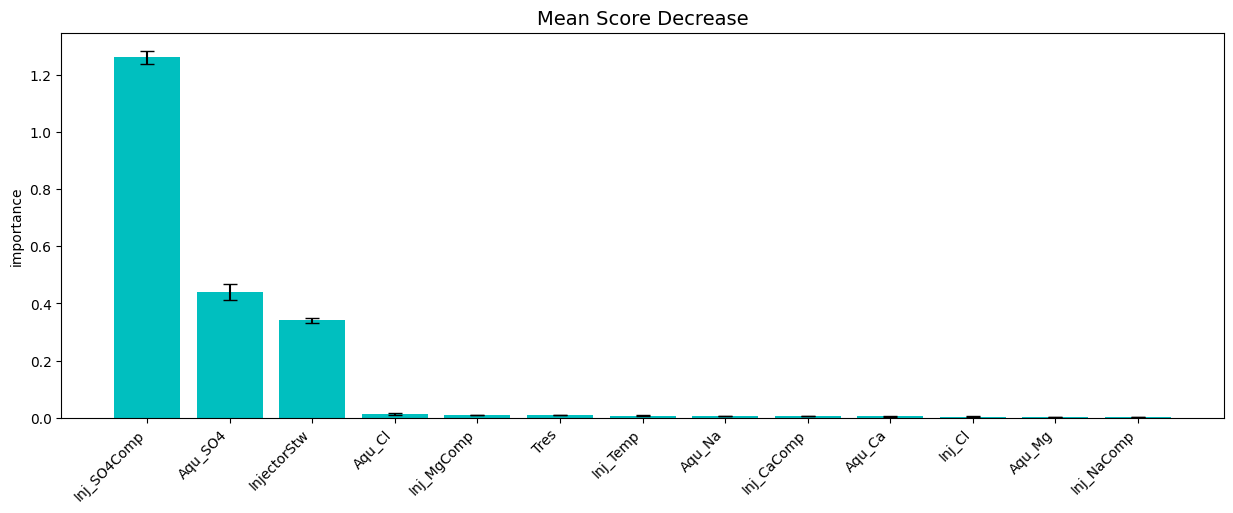

In [31]:
mean_score_decrease(X_train, y_train, model_RF, plot = True, topk = None)

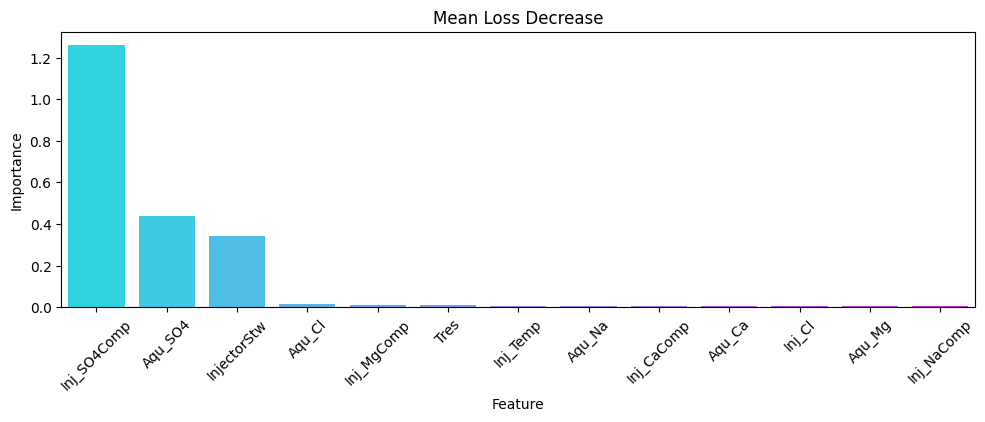

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from jcopml.plot import plot_residual

def plot_residual(df_imp):
    plt.figure(figsize=(10, 4.325))
    sns.barplot(x='feature', y='importance', data=df_imp, palette='cool')
    plt.xticks(rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Mean Loss Decrease')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/00_Image_Processing/Pictures/Mean_Score_Decrease_600dpi.png', dpi=600)
    plt.show()

df_imp = mean_score_decrease(X_train, y_train, model_RF, plot=False, topk=18)
plot_residual(df_imp.head(18))